## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split


# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:

# Display information about the dataset
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
# Display summary statistics of the dataset
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [10]:
# Columns where zeros should be replaced with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN in the specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)


**<font color='teal'> Plot histograms of each column. </font>**

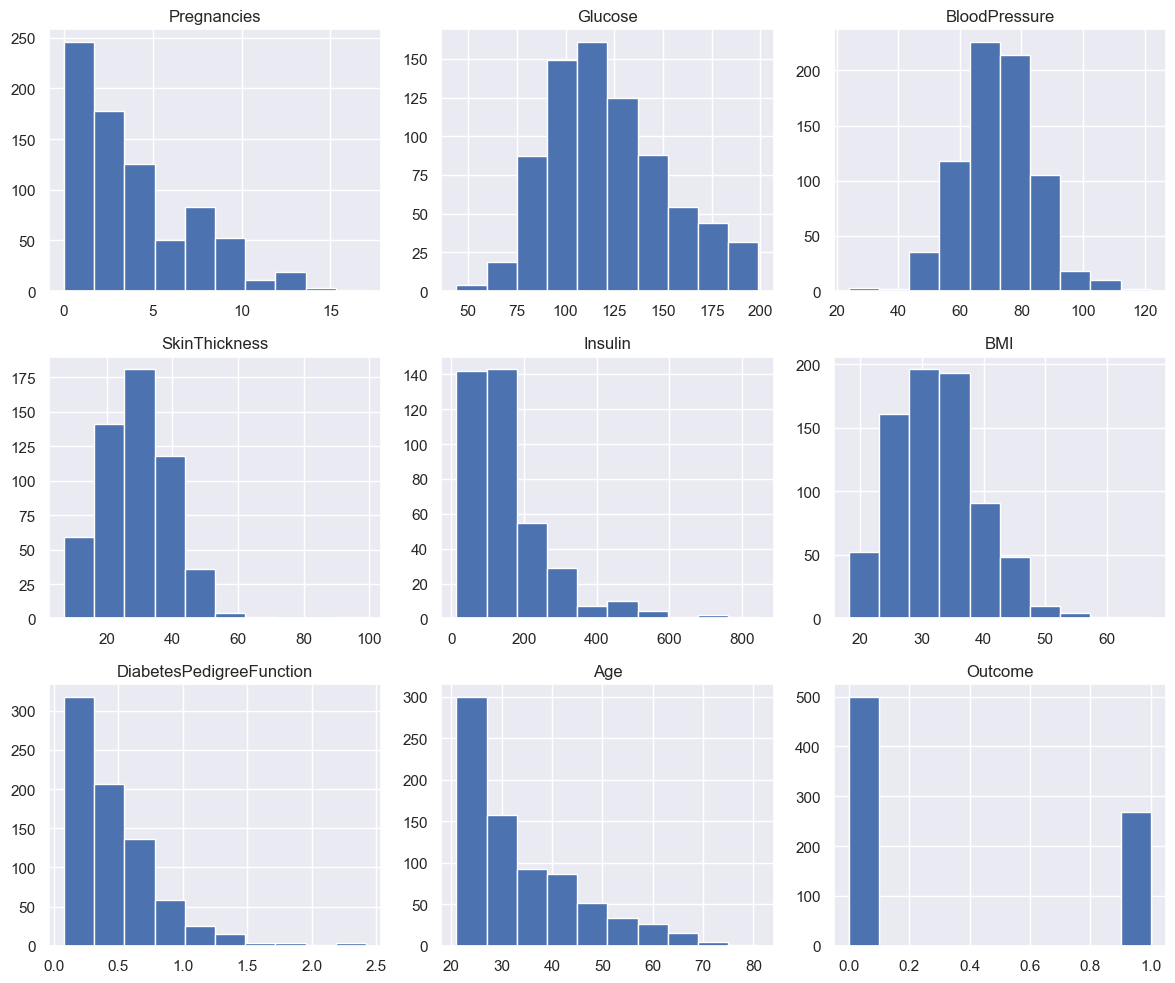

In [11]:
# Plot histograms of each column
diabetes_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [12]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

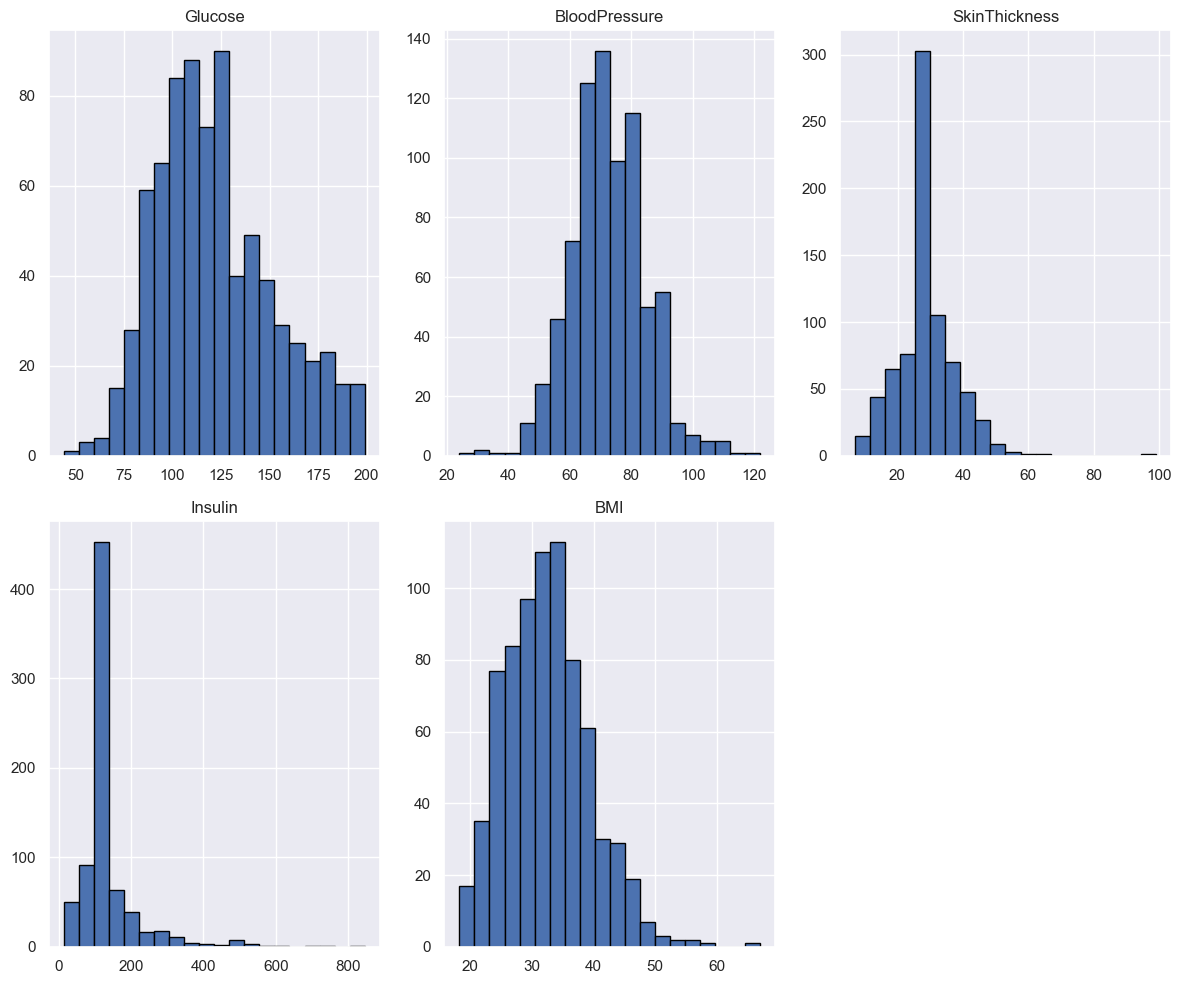

In [14]:
# Plot histograms for specific columns after filling NaNs
plt.figure(figsize=(12, 10))

# Plot for Glucose
plt.subplot(231)  # 2 rows, 3 columns, position 1
plt.hist(diabetes_data['Glucose'], bins=20, edgecolor='black')
plt.title('Glucose')

# Plot for BloodPressure
plt.subplot(232)  # 2 rows, 3 columns, position 2
plt.hist(diabetes_data['BloodPressure'], bins=20, edgecolor='black')
plt.title('BloodPressure')

# Plot for SkinThickness
plt.subplot(233)  # 2 rows, 3 columns, position 3
plt.hist(diabetes_data['SkinThickness'], bins=20, edgecolor='black')
plt.title('SkinThickness')

# Plot for Insulin
plt.subplot(234)  # 2 rows, 3 columns, position 4
plt.hist(diabetes_data['Insulin'], bins=20, edgecolor='black')
plt.title('Insulin')

# Plot for BMI
plt.subplot(235)  # 2 rows, 3 columns, position 5
plt.hist(diabetes_data['BMI'], bins=20, edgecolor='black')
plt.title('BMI')

plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


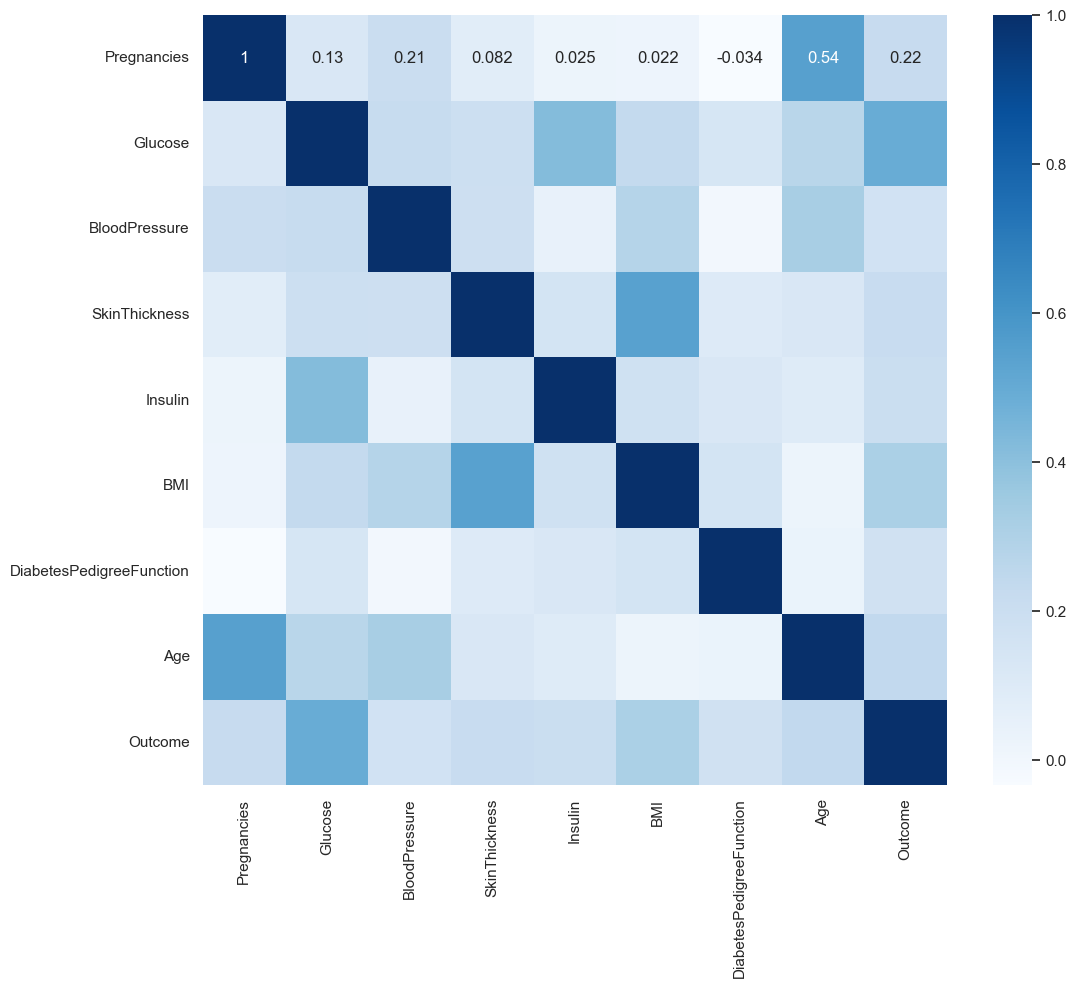

In [15]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

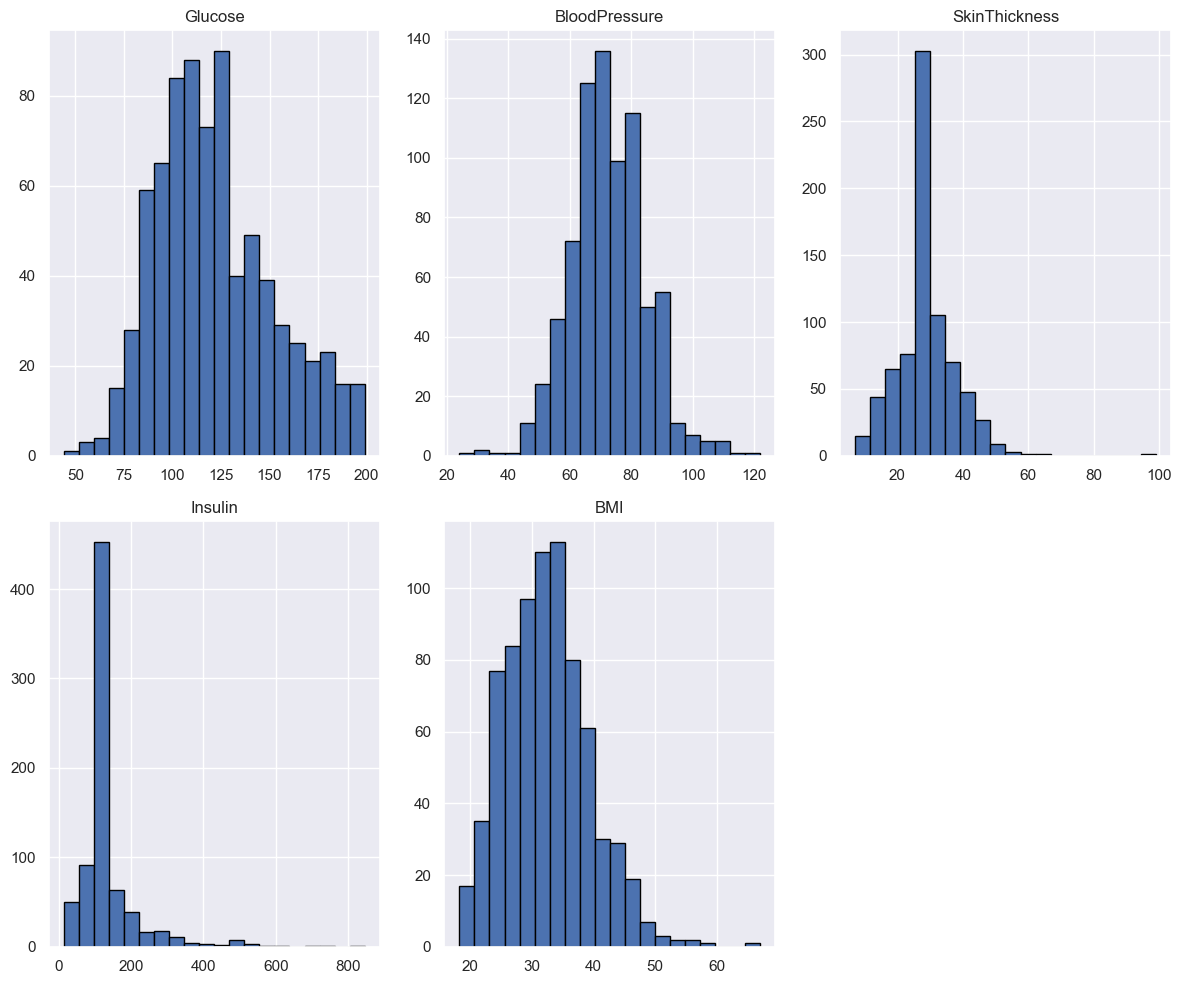

In [16]:

# Define the y variable
y = diabetes_data['Outcome']

# Plot histograms for specific columns after filling NaNs
plt.figure(figsize=(12, 10))

# Plot for Glucose
plt.subplot(231)  # 2 rows, 3 columns, position 1
plt.hist(diabetes_data['Glucose'], bins=20, edgecolor='black')
plt.title('Glucose')

# Plot for BloodPressure
plt.subplot(232)  # 2 rows, 3 columns, position 2
plt.hist(diabetes_data['BloodPressure'], bins=20, edgecolor='black')
plt.title('BloodPressure')

# Plot for SkinThickness
plt.subplot(233)  # 2 rows, 3 columns, position 3
plt.hist(diabetes_data['SkinThickness'], bins=20, edgecolor='black')
plt.title('SkinThickness')

# Plot for Insulin
plt.subplot(234)  # 2 rows, 3 columns, position 4
plt.hist(diabetes_data['Insulin'], bins=20, edgecolor='black')
plt.title('Insulin')

# Plot for BMI
plt.subplot(235)  # 2 rows, 3 columns, position 5
plt.hist(diabetes_data['BMI'], bins=20, edgecolor='black')
plt.title('BMI')

plt.tight_layout()
plt.show()

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [19]:

# Assuming diabetes_data is already loaded and processed, and y is defined as diabetes_data['Outcome']

# Define X (features) excluding the Outcome column
X = diabetes_data.drop('Outcome', axis=1)

# Define y (target variable)
y = diabetes_data['Outcome']

# Perform 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of the datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on X_train
scaler.fit(X_train)

# Transform X_train and X_test using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled and X_test_scaled are now scaled versions of X_train and X_test, respectively

# Print the shapes of the scaled datasets to verify
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (537, 8)
X_test_scaled shape: (231, 8)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [22]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [23]:
test_scores = []
train_scores = []

# Iterate through values of k from 1 to 9
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)  # Use scaled X_train
    
    # Calculate train and test scores
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    # Append scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Print scores for each iteration
    print(f"Iteration {i}: Train score = {train_score:.4f}, Test score = {test_score:.4f}")


Iteration 1: Train score = 1.0000, Test score = 0.6667
Iteration 2: Train score = 0.8510, Test score = 0.6710
Iteration 3: Train score = 0.8547, Test score = 0.6710
Iteration 4: Train score = 0.8417, Test score = 0.6926
Iteration 5: Train score = 0.8399, Test score = 0.7013
Iteration 6: Train score = 0.8231, Test score = 0.6840
Iteration 7: Train score = 0.8343, Test score = 0.7316
Iteration 8: Train score = 0.8212, Test score = 0.7359
Iteration 9: Train score = 0.8268, Test score = 0.7316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

The maximum training score observed is 1.0000, which occurred in Iteration 1 when k=1. This indicates that using k=1 resulted in perfect classification on the training data, achieving 100% accuracy--a perfect score on the training data (k=1) may not necessarily generalize well to unseen test data, as indicated by the lower test scores observed across different k values.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

The maximum testing score observed is 0.7359, which occurred in Iteration 8 when k=8. This indicates that using k=8 resulted in the highest accuracy on the testing dataset among all iterations.

Plot the train and test model performance by number of neighbors.

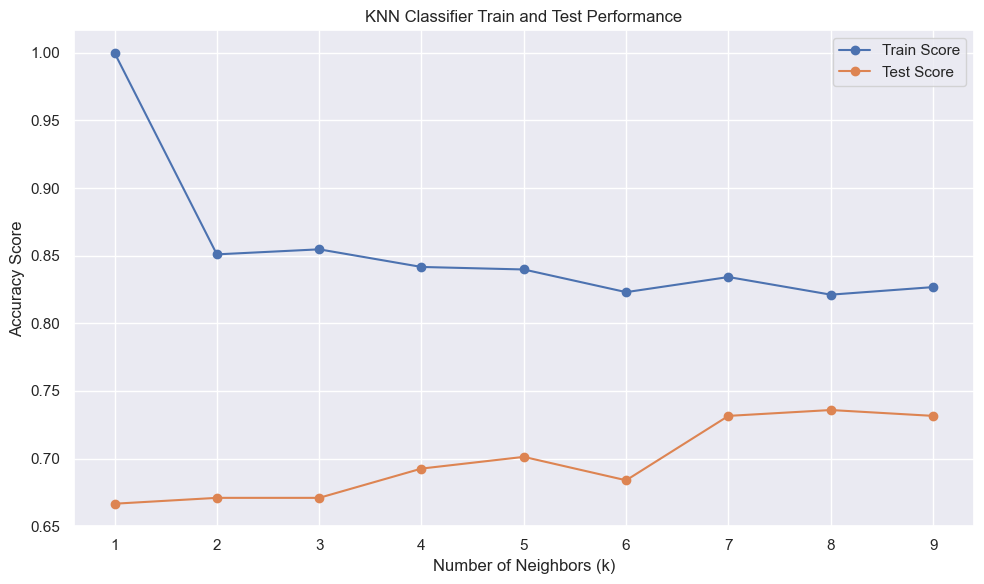

In [25]:
# Define the range of neighbors (k values)
neighbors = range(1, 10)

# Plot train and test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, marker='o', label='Train Score')
plt.plot(neighbors, test_scores, marker='o', label='Test Score')
plt.title('KNN Classifier Train and Test Performance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [26]:

# Define the best k based on the analysis
best_k = 8

# Create the KNN classifier with best_k neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Evaluate the classifier on training data
train_score = knn.score(X_train_scaled, y_train)

# Evaluate the classifier on testing data
test_score = knn.score(X_test_scaled, y_test)

# Print the train and test scores
print(f"Train score with k={best_k}: {train_score:.4f}")
print(f"Test score with k={best_k}: {test_score:.4f}")


Train score with k=8: 0.8212
Test score with k=8: 0.7359


In [27]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

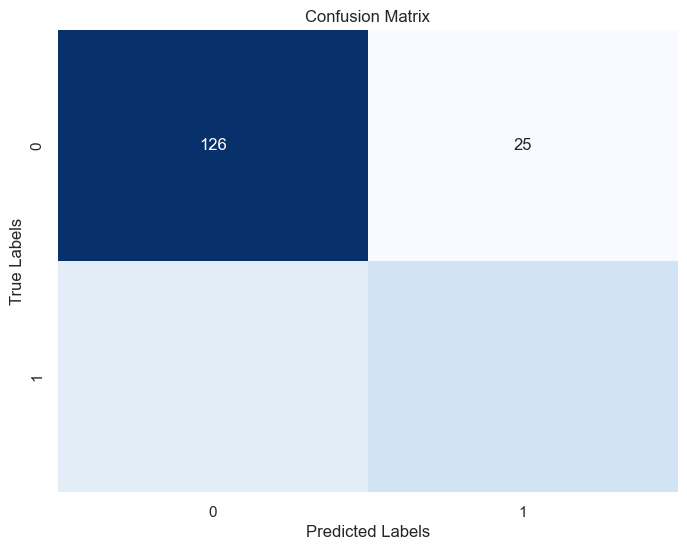

In [28]:
from sklearn.metrics import confusion_matrix



# Predict labels for the test set
y_pred = knn.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [29]:
from sklearn.metrics import classification_report

# Predict labels for the test set
y_pred = knn.predict(X_test_scaled)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [31]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]  # Example values for number of trees
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Setup GridSearchCV
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit GridSearchCV
rf_cv.fit(X, y)  # Replace X and y with your data

# Print best score and best parameters
print("Best Score:", rf_cv.best_score_)
print("Best Parameters:", rf_cv.best_params_)


Best Score: 0.7656565656565656
Best Parameters: {'n_estimators': 50}
